In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from xgboost import XGBRegressor, XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score
import joblib

In [25]:
data = pd.read_csv('data/data_cl.csv')

In [12]:
if data.isnull().sum().sum() > 0:
    print('Есть пропущенные значения')

Есть пропущенные значения


In [26]:
data.head()

,Unnamed: 0,"IC50, mM","CC50, mM",SPS,Kappa2,Kappa3,PEOE_VSA8,SMR_VSA4,EState_VSA5,VSA_EState3,VSA_EState4,VSA_EState8,MolLogP,SI
0,0,6.239374,175.482380,42.928570,6.947535,2.868737,35.342865,43.480583,12.132734,0.000000,4.807589,16.981087,7.12120,28.125000
1,1,0.771831,5.402819,45.214287,7.257648,3.027177,12.083682,33.495773,12.132734,7.922833,2.153503,4.160013,6.15560,7.000000
2,2,223.808780,161.142320,42.187500,7.709373,3.470070,23.671625,33.495773,12.132734,0.000000,2.184128,4.160013,7.12920,0.720000
3,3,1.705624,107.855650,41.862070,7.485204,3.263848,35.342865,43.480583,12.132734,0.000000,4.827852,17.012012,7.51130,3.044354
4,4,107.131530,139.271000,36.514286,7.639211,3.345855,22.253351,43.480583,12.132734,0.000000,9.071783,14.692318,3.43375,1.300000


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1001 non-null   int64  
 1   IC50, mM     1001 non-null   float64
 2   CC50, mM     1001 non-null   float64
 3   SPS          1001 non-null   float64
 4   Kappa2       1001 non-null   float64
 5   Kappa3       1001 non-null   float64
 6   PEOE_VSA8    1001 non-null   float64
 7   SMR_VSA4     1001 non-null   float64
 8   EState_VSA5  1001 non-null   float64
 9   VSA_EState3  1001 non-null   float64
 10  VSA_EState4  1001 non-null   float64
 11  VSA_EState8  1001 non-null   float64
 12  MolLogP      1001 non-null   float64
 13  SI           1001 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 109.6 KB


In [28]:
data.describe()

,Unnamed: 0,"IC50, mM","CC50, mM",SPS,Kappa2,Kappa3,PEOE_VSA8,SMR_VSA4,EState_VSA5,VSA_EState3,VSA_EState4,VSA_EState8,MolLogP,SI
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,500.000000,76.518092,498.129359,29.487989,5.828347,2.754006,16.318213,10.768270,15.359210,6.052866,2.080877,4.756237,3.514113,6.623130
std,289.108111,108.709874,467.838319,12.742749,2.162560,1.157859,10.523220,10.681285,13.398753,6.833026,2.757493,4.158631,1.456088,8.419461
min,0.000000,0.003517,0.700808,9.416667,1.335792,0.444985,0.000000,0.000000,0.000000,-1.258309,-4.582644,-2.210722,-0.579800,0.011489
25%,250.000000,12.515396,99.999040,18.486486,4.372750,2.001771,6.923737,0.000000,5.563451,0.000000,0.188200,1.302284,2.593520,1.433333
50%,500.000000,32.000140,349.577360,29.290323,5.522842,2.567275,17.016043,5.917906,12.132734,3.493716,1.898749,4.160013,3.433750,3.044354
75%,750.000000,89.391205,818.701300,38.750000,7.099208,3.414433,23.027195,17.250803,24.629349,10.267094,4.044890,7.279098,4.329200,7.246377
max,1000.000000,538.006600,2062.987000,60.272728,12.259986,6.266790,47.259620,43.983498,55.512270,28.473925,9.968339,17.035702,7.592520,38.168095


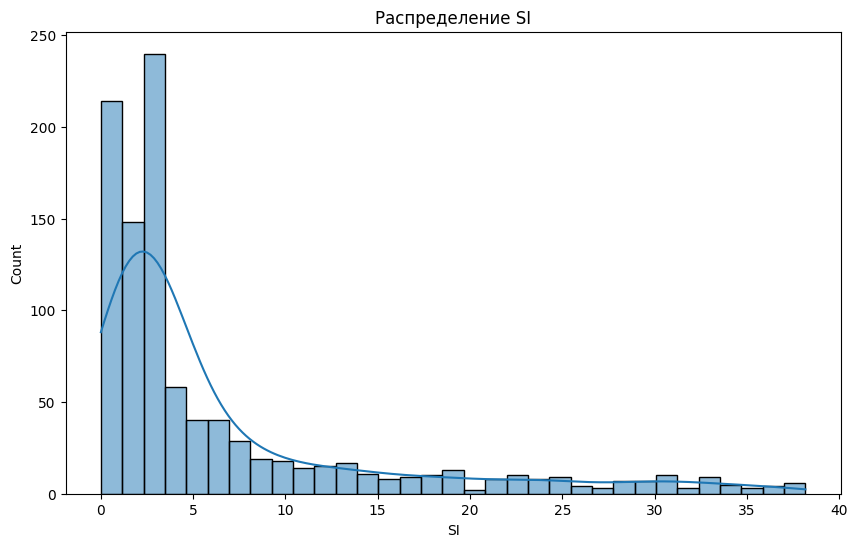

In [29]:
# Визуализация распределения целевой переменной IC50
plt.figure(figsize=(10, 6))
sns.histplot(data['SI'], kde=True)
plt.title('Распределение SI')
plt.savefig('results/SI_distribution.png')
plt.show()

In [30]:
# Разделение на признаки и целевую переменную
X = data.drop(['SI', 'Unnamed: 0'], axis=1)
y_ic50 = data['SI']

# Масштабирование признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение на train/test (для финальной оценки)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_ic50, test_size=0.2, random_state=42)

### Модель


In [31]:
def evaluate_models(models, X, y, cv=5):
    """
    Функция для оценки метрик  
    """
    results = {}
    
    for name, model in models.items():
        # Оценка с использованием отрицательной средней квадратичной ошибки
        mse_scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')
        results[name] = {
            'mean_mse': -mse_scores.mean(),
            'std_mse': mse_scores.std(),
            'all_mse_scores': -mse_scores
        }
        
        # Оценка с использованием средней абсолютной ошибки
        mae_scorer = make_scorer(mean_absolute_error)
        mae_scores = cross_val_score(model, X, y, cv=cv, scoring=mae_scorer)
        results[name]['mean_mae'] = mae_scores.mean()
        results[name]['std_mae'] = mae_scores.std()
        results[name]['all_mae_scores'] = mae_scores
        
        # Оценка с использованием R_2
        r2_scorer = make_scorer(r2_score)
        r2_scores = cross_val_score(model, X, y, cv=cv, scoring=r2_scorer)
        results[name]['mean_r2'] = r2_scores.mean()
        results[name]['std_r2'] = r2_scores.std()
        results[name]['all_r2_scores'] = r2_scores

    return results

### Регрессия

In [32]:
# Инициализация моделей
reg_models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'SVR': SVR(),
    'KNN': KNeighborsRegressor(),
    'XGBoost': XGBRegressor(random_state=42)
}

In [33]:
reg_results = evaluate_models(reg_models, X_train, y_train)

In [34]:
# Вывод результатов
print("Результаты регрессии:")
for name, res in reg_results.items():
    print(f"{name}:")
    print(f"  Средняя MSE: {res['mean_mse']:.4f}, стандартное отклонение: {res['std_mse']:.4f}")
    print(f"  Средняя MAE: {res['mean_mae']:.4f}, стандартное отклонение: {res['std_mae']:.4f}")
    print(f"  Средний R²: {res['mean_r2']:.4f}, стандартное отклонение: {res['std_r2']:.4f}")

Результаты регрессии:
Linear Regression:
  Средняя MSE: 66.8991, стандартное отклонение: 20.3326
  Средняя MAE: 5.8754, стандартное отклонение: 0.7600
  Средний R²: 0.0433, стандартное отклонение: 0.0270
Random Forest:
  Средняя MSE: 29.6829, стандартное отклонение: 7.1324
  Средняя MAE: 3.0058, стандартное отклонение: 0.3914
  Средний R²: 0.5653, стандартное отклонение: 0.0434
SVR:
  Средняя MSE: 80.8694, стандартное отклонение: 29.1552
  Средняя MAE: 4.7996, стандартное отклонение: 0.9534
  Средний R²: -0.1368, стандартное отклонение: 0.0637
KNN:
  Средняя MSE: 76.3261, стандартное отклонение: 24.3282
  Средняя MAE: 5.9892, стандартное отклонение: 0.9785
  Средний R²: -0.0838, стандартное отклонение: 0.0892
XGBoost:
  Средняя MSE: 29.7081, стандартное отклонение: 10.1954
  Средняя MAE: 2.8605, стандартное отклонение: 0.4914
  Средний R²: 0.5709, стандартное отклонение: 0.0637


**Вывод**

Random Forest показывает значительно лучшие результаты, с средней MSE (29.6829) и MAE (3.0058), что указывает на более точные предсказания. Значение R² (0.5653) говорит о том, что эта модель способна объяснить 56.53% вариации в данных, что является заметным улучшением по сравнению с линейной регрессией.

### Подбор гиперпараметров для лучших моделей

Для регрессии Random Forest

In [35]:
# Параметры для поиска
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [36]:
# Поиск по сетке
grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error'
)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [37]:
# Лучшие параметры
print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучший MSE: {-grid_search.best_score_:.4f}")

Лучшие параметры: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Лучший MSE: 29.6829


In [39]:
# Обучение финальной модели
best_reg_model = grid_search.best_estimator_

▎5. Оценка на тестовом наборе и визуализация

▎Регрессия

In [40]:
# Предсказания
y_pred = best_reg_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

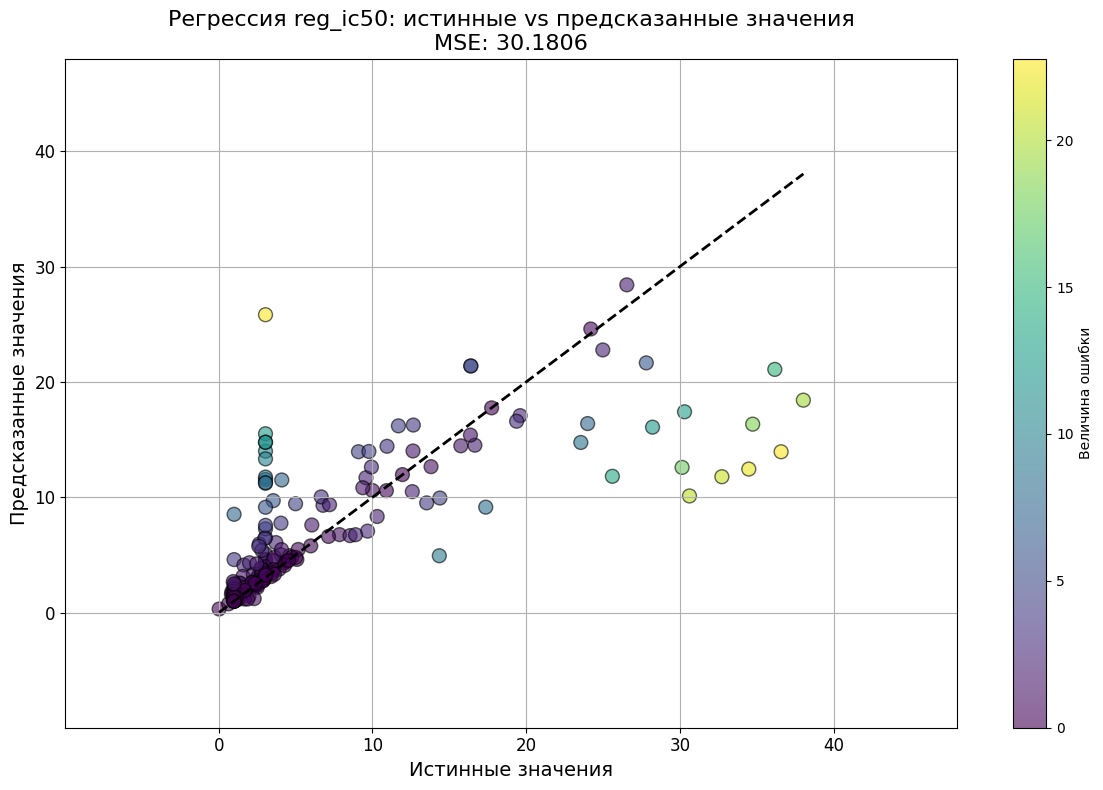

In [42]:
# Визуализация
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred, alpha=0.6, c=np.abs(y_test - y_pred), s=100, cmap='viridis', edgecolors='k')
plt.colorbar(label='Величина ошибки')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', linewidth=2)
plt.xlabel('Истинные значения', fontsize=14)
plt.ylabel('Предсказанные значения', fontsize=14)
plt.title(f'Регрессия reg_ic50: истинные vs предсказанные значения\nMSE: {mse:.4f}', fontsize=16)
plt.grid(True)
plt.xlim([y_test.min() - 10, y_test.max() + 10])
plt.ylim([y_test.min() - 10, y_test.max() + 10])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig('results/regression_results_reg_SI50.png')
plt.show()

### 6. Анализ важности признаков

/tmp/ipykernel_762653/2090736488.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Importance', y='Feature', data=features_df, palette='viridis')


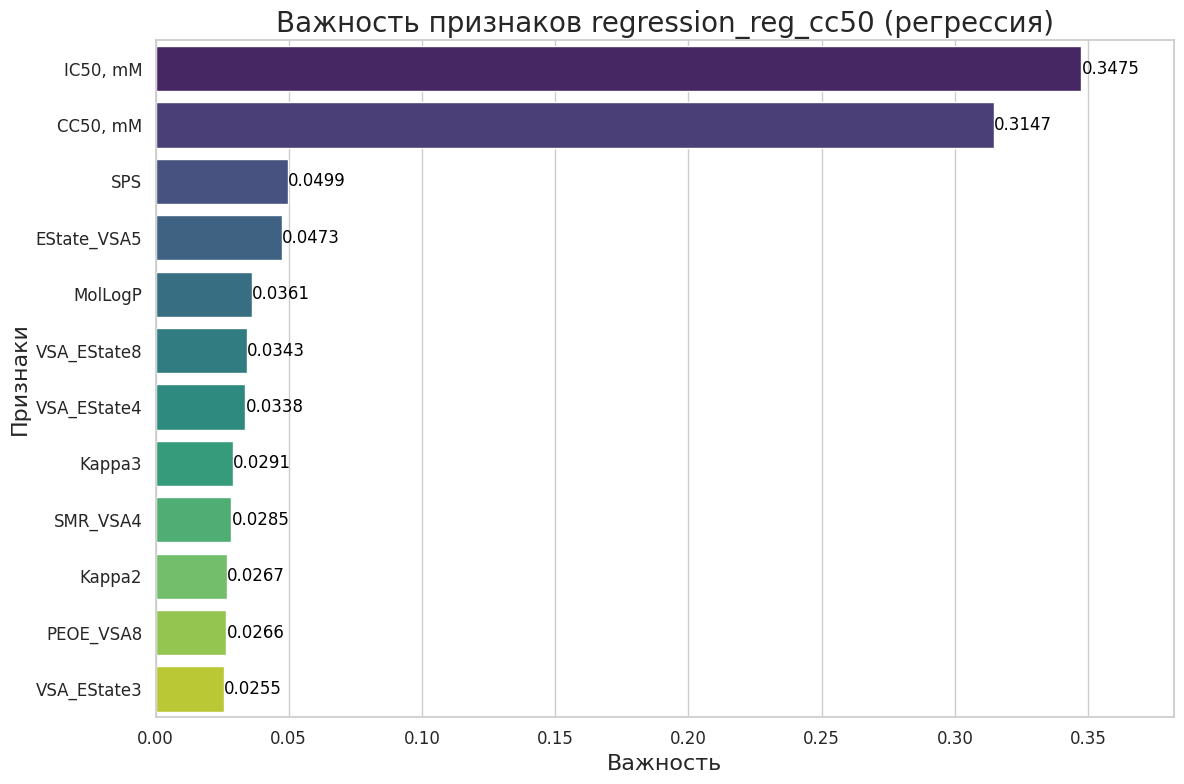

Выводы о важности признаков:
Наиболее важные признаки для модели регрессии:
IC50, mM: Важность = 0.3475
CC50, mM: Важность = 0.3147
SPS: Важность = 0.0499
EState_VSA5: Важность = 0.0473
MolLogP: Важность = 0.0361
VSA_EState8: Важность = 0.0343
VSA_EState4: Важность = 0.0338
Kappa3: Важность = 0.0291
SMR_VSA4: Важность = 0.0285
Kappa2: Важность = 0.0267
PEOE_VSA8: Важность = 0.0266
VSA_EState3: Важность = 0.0255

Наиболее важный признак: IC50, mM с важностью 0.3475
Наименее важный признак: VSA_EState3 с важностью 0.0255


In [43]:
if hasattr(best_reg_model, 'feature_importances_'):
    importances = best_reg_model.feature_importances_
    feature_names = X.columns
    features_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    features_df = features_df.sort_values('Importance', ascending=False)

    # Настройка стиля
    sns.set(style='whitegrid')

    plt.figure(figsize=(12, 8))
    bar_plot = sns.barplot(x='Importance', y='Feature', data=features_df, palette='viridis')

    # Добавление значений на столбцах
    for index, value in enumerate(features_df['Importance']):
        bar_plot.text(value, index, f'{value:.4f}', color='black', ha="left", va="center")

    plt.title('Важность признаков regression_reg_cc50 (регрессия)', fontsize=20)
    plt.xlabel('Важность', fontsize=16)
    plt.ylabel('Признаки', fontsize=16)
    plt.xlim(0, features_df['Importance'].max() * 1.1)  # Увеличение лимита оси X
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    plt.tight_layout()
    plt.savefig('results/feature_importance_regression_reg_SI50.png')
    plt.show()

    # Выводы
    print("Выводы о важности признаков:")
    print("Наиболее важные признаки для модели регрессии:")
    for i, row in features_df.iterrows():
        print(f"{row['Feature']}: Важность = {row['Importance']:.4f}")

    # Дополнительные выводы
    most_important_feature = features_df.iloc[0]
    print(f"\nНаиболее важный признак: {most_important_feature['Feature']} с важностью {most_important_feature['Importance']:.4f}")
    
    # Можно добавить вывод о том, какие признаки менее важны
    least_important_feature = features_df.iloc[-1]
    print(f"Наименее важный признак: {least_important_feature['Feature']} с важностью {least_important_feature['Importance']:.4f}")

### 7. Сохранение результатов и моделей

In [44]:
# Сохранение моделей
joblib.dump(best_reg_model, 'results/best_regression_model_reg_SI50.pkl')


# Сохранение результатов
results_df = pd.DataFrame({'Regression MSE': [reg_results[model]['mean_mse'] for model in reg_results]})

results_df.to_csv('results/model_reg_SI.csv', index=True)


### Проверка гипотезы

In [49]:
# Расчет метрик
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')

# Проверка гипотезы
if r2 > 0.5 and mae < 29.6829:  # Установите ваш порог для MAE
    print("H1: ML-модели способны воспроизводить SI с предсказательной способностью, превышающей случайный уровень.")
else:
    print("H0: Соотношение SI не поддаётся адекватному прогнозу лучше, чем случайная модель.")

MSE: 30.18058481594498
MAE: 2.7801558801062187
R²: 0.571972666119189
H1: ML-модели способны воспроизводить SI с предсказательной способностью, превышающей случайный уровень.


Отвергаем Н0, принмсаем гипотезу H1: 

"ML-модели способны воспроизводить SI с предсказательной способностью, превышающей случайный уровень." Это значит, что модель действительно может делать предсказания, которые лучше случайных.

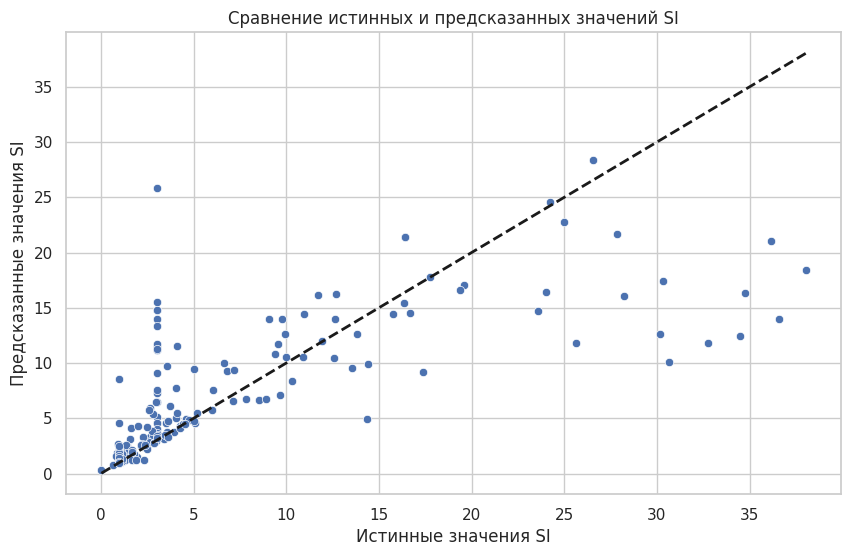

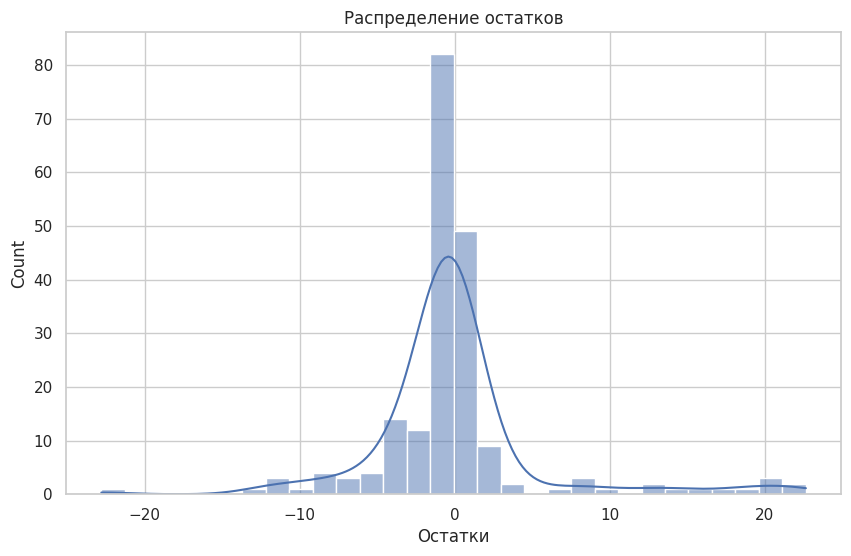

In [48]:
# Визуализация предсказаний против истинных значений
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Истинные значения SI')
plt.ylabel('Предсказанные значения SI')
plt.title('Сравнение истинных и предсказанных значений SI')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Линия y=x
plt.show()

# Визуализация остатков
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Остатки')
plt.title('Распределение остатков')
plt.show()

Гистограмма показывает распределение остатков (разности между истинными и предсказанными значениями). Идеальное распределение остатков должно быть нормальным с центром в нуле.

Если гистограмма симметрична и сосредоточена вокруг нуля, это говорит о том, что модель не имеет систематических ошибок (например, не переоценивает или недооценивает значения). Если наблюдаются смещения или асимметрия в распределении остатков, это может указывать на проблемы с моделью, такие как необходимость в преобразовании данных или добавлении новых признаков.